In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Zomato_data.csv')
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
## checking the null values in dataframe 

In [4]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
s = data['rate'].astype(str)


In [7]:
## Split the rating in require formate 

In [8]:
def hadle_rate(x):
    x = str(x).split('/')
    x = x[0];
    return float(x)
data['rate'] = data['rate'].apply(hadle_rate)

In [9]:
data['rate']

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64

In [10]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Checking which type of the Resturant getting the highest amount of  orders

Text(0.5, 0, 'Type of Resturant')

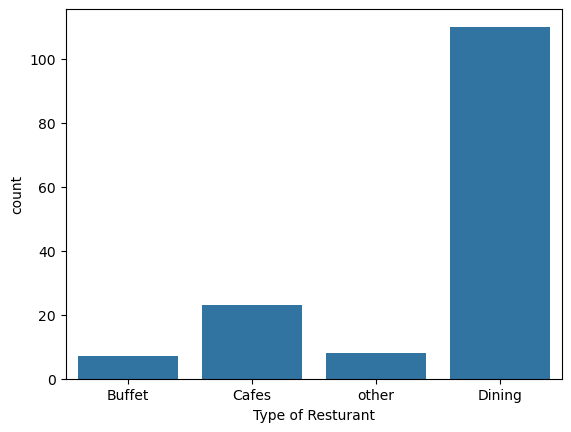

In [13]:
sns.countplot(x = data['listed_in(type)'])
plt.xlabel("Type of Resturant")

### checking the which type of the Resturant getting high amount of votes (Ratings)

Text(0, 0.5, 'Votes')

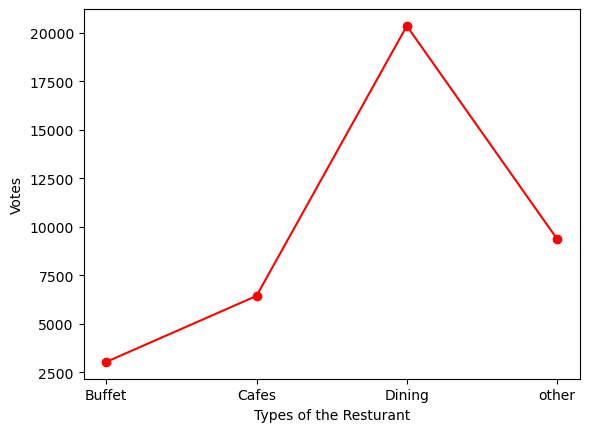

In [15]:
group = data.groupby('listed_in(type)')['votes'].sum()

result = pd.DataFrame({'votes' : group})
plt.plot(result, c='red',marker = 'o')
plt.xlabel('Types of the Resturant')
plt.ylabel('Votes')

## checking the Majority Ratings ratios

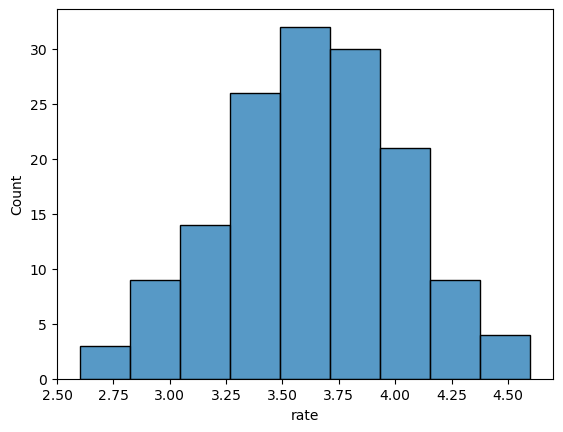

In [17]:
sns.histplot(data['rate'] , )
plt.show()

## checking the Averrage Cost spend by Couple on food 

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

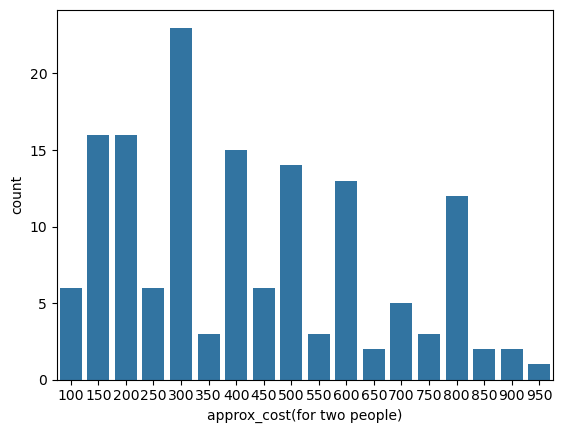

In [19]:
couple_data = data['approx_cost(for two people)']
sns.countplot(x =couple_data)

## Online and offline order Ratios 

<Axes: xlabel='online_order', ylabel='rate'>

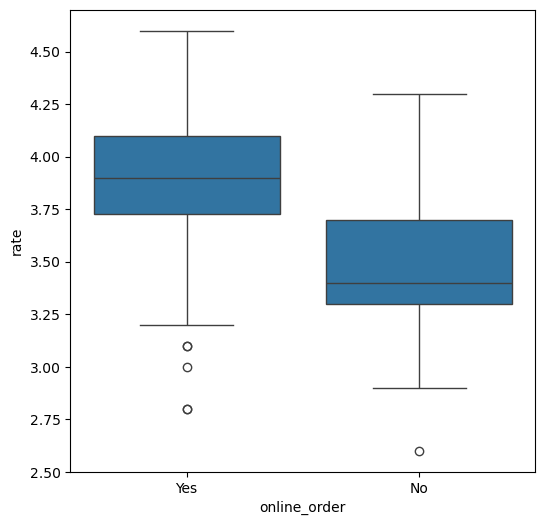

In [20]:
plt.figure(figsize=(6,6))
sns.boxplot(x= 'online_order', y = 'rate', data = data)

## heatmap for the overall view of the online and offline orders according to Resturants 

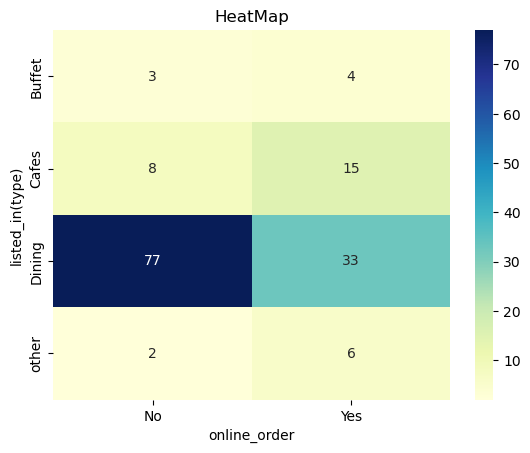

In [21]:
pivot_table = data.pivot_table(index="listed_in(type)" , columns='online_order', aggfunc='size' , fill_value=0)
sns.heatmap(pivot_table , annot= True , cmap= "YlGnBu", fmt='d')
plt.title('HeatMap')
plt.xlabel = ""
plt.ylabel = " "
plt.show()